# Coastal Systems Notebook 3 (week 9): Escoffier curve

In chapter 9 of the book and slides, we learned about tidal inlets and their stability. Tidal inlets are very dynamic and their stability depend on a lot of factors. Escoffier was the first to study the stability of tidal inlets. More specifically, he studied the cross-sectional area of tidal inlets as they change throughout the tidal cycle. From his studies, Escoffier developed the now well-known Escoffier curve. In this notebook we will use an interactive approach to better understand the Escoffier curve. Afterwards you are tasked to answer some questions to verify your knowledge on the topic.

Before starting this notebook, make sure you followed the lectures on chapter 9 (or read the slides) and read section 9.5.1 of the book. Also, run the code below to import and check the necessary packages.

In [1]:
import os
import pathlib
import sys

# make coastpy library importable by appending root to path
cwd = pathlib.Path().resolve()
proj_dir = cwd.parent.parent  # this is the root of the CoastalCodeBook
sys.path.append(str(proj_dir / "src"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from hidden import *

DATA_DIR = proj_dir / "data"
FIG_DIR = proj_dir / "coastalcodebook" / "assignments" / "figures"

## 1. Creating an Escoffier curve

Escoffier’s curve is a so-called closure curve and describes the relationship between maximum channel velocity $u_e$ and the parameter $X$, which is primarily, but not solely, a function of the channel cross-section. If we consider a sinusoidal tidal velocity signal:

$$
\begin{aligned}
u_e = \hat{u}_e = \frac{\pi P}{A_e T}
\end{aligned}
$$

Where $\hat{u}_e$ is the tidal signal amplitude, $P$ the tidal prism, $A_e$ the channel cross-section and $T$ the tidal period (see Intermezzo 9.4 of the book, equation 9.5).


The process that leads to the Escoffier curve is explained in the book. In this notebook we provide a short visualisation, see the interactive plot below. We start with an imaginary channel cross-section that is very small, close to point A, such that the tidal difference in the estuary is smaller than the tidal range. Increasing the cross-section ($A_e$) results in an increase of the tidal prism ($P$) so large that $u_e$ increases too (recall eq. 9.5). At some point the tidal difference in the estuary is equal to the tidal range and we reach the peak of the closure curve. A larger cross-section now reduces $u_e$ as $P$ remains constant (again, recall eq. 9.5).

```
=> @DANIEL: Please insert the interactive plot in the codeblock below. You can find the figures necessary in the folder of this assignment. The idea is to simply display a figure using a slider widget. So in essence you shouldn't have to code anything to create the graphs of the figure, just display the right image when the slider is moved. I suggest to use ipywidgets, see https://github.com/jupyter-widgets/ipywidge
ts#readme. Importing the package is done above. I got an error when importing the package because it wasn't installed in the environment. I installed it using Anaconda prompt, activating the environment and running 'pip install ipywidgets'.
```

In [3]:
# from dash import dcc, html, Input, Output,Dash

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = Dash(__name__, external_stylesheets=external_stylesheets)

# app.layout = html.Div([
#     dcc.Slider(0, 20, 5,
#                value=10,
#                id='my-slider'
#     ),
#     html.Div(id='slider-output-container')
# ])

# @app.callback(
#     Output('slider-output-container', 'children'),
#     Input('my-slider', 'value'))
# def update_output(value):
#     return 'You have selected "{}"'.format(value)

# if __name__ == '__main__':
#     app.run_server(debug=True)

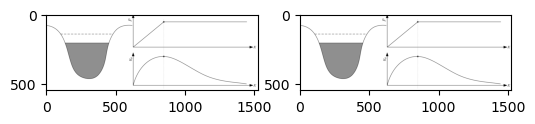

In [4]:
# @DANIEL: this is the codeblock for the interactive plot
%matplotlib notebook
# %%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data


def f(Median_Size):
    selem = disk(int(Median_Size))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_median = rank.median(img_gray, selem=selem) 

    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    display(fig)

image =  plt.imread(FIG_DIR / "04_Ch9_Escoffier_interactive_3.png")  #skimage.data.camera()
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(6, 4))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")

In [5]:
interact(f, Median_Size=widgets.IntSlider(min=1,max=21,step=2,value=1));

interactive(children=(IntSlider(value=1, description='Median_Size', max=21, min=1, step=2), Output()), _dom_cl…

## TODO:

The image viewer slider doesn't work really well on MacOS.

In [6]:
from tkinter import *
root = Tk()
root.title('Photo Slider')
root.geometry('630x400')
root.resizable(False, False)

def on_next():
    image_show_box_photo.configure(file=FIG_DIR / "04_Ch9_Escoffier_interactive_1.png")
    next_button_label.bind("<Button>", lambda e:onclick_back())

def onclick_back():
    image_show_box_photo.configure(file=FIG_DIR / "Ch9_Escoffier_interactive_2.png")
    back_button_label.bind("<Button>", lambda e:on_next())

# back image button
back_button_fig = PhotoImage(file=FIG_DIR / "04_Back.png")
back_button_label = Label(root, image=back_button_fig, border=0)
back_button_label.place(x=50,y=100)

# next image button
next_button_fig = PhotoImage(file=FIG_DIR / "04_Next.png")
next_button_label = Label(root, image=next_button_fig, border=0)
next_button_label.place(x=50,y=100)

#image show box
image_show_box_photo = PhotoImage(file=FIG_DIR / "04_Ch9_Escoffier_interactive_1.png")
image_show_box_label = Label(root, image=image_show_box_photo)
image_show_box_label.place(x=150,y=50)

#label bind
back_button_label.bind("<Button>", lambda e:on_next())
next_button_label.bind("<Button>", lambda e:onclick_back())


root.mainloop()

The next step is to determine an equilibrium channel velocity $u_{eq}$ below which no erosion of the channel occurs. This velocity is only slightly dependent on the cross-section and can be approximated as just a function of sediment size. Larger sediment size leads to a larger $u_{eq}$ and vice versa.

The closure curve and a value for u_eq leads to the well-known Escoffier curve as depicted in Figure 9.22 in the book.


![](./figures/04_Ch9_Escoffier_type_1.png)
```
=> @DANIEL: Insert image "Escoffier_curve_typical.png"
```


## 2. Questions

Now that you know how an Escoffier curve is created and some of the physical processes behind it, it's time to test your understanding. Try to answer the questions below and give your answers in the corresponding codeblock. Run the codeblock to validate your answers and view your feedback.

### Channel stability

Consider the Escoffier curve below with points A, B, C, D and E. What happens to the channel cross-section ($X$) at locations 1, 2, 3, 4 and 5? Where does it move to, point A, B, C, D, E or neither (N)? ):
```
=> @DANIEL: Insert image "Escoffier_curve_Qstability.png"
```

![put fig title/label here](./figures/04_Ch9_Escoffier_stability_1.png)

Put your answers here:

```
=> @DANIEL: Can you code the processing of the answers? Students give their answers below and run the block. Depending on their answer (correct or incorrect) they get to see a message. If correct something like "That is correct!". If incorrect each question should have some specific feedback, or if we want more detailed feedback each incorrect answer has some specific feedback. Feedback text is provided at the bottom of the notebook.
```

In [7]:
ans0 = 'N'  # Example answer

ans1 = 'A'  # Your answer for point 1
ans2 = 'C'  # Your answer for point 2
ans3 = 'D'  # Your answer for point 3
ans4 = 'D'  # Your answer for point 4
ans5 = 'D'  # Your answer for point 5

Check1(ans1,ans2,ans3,ans4,ans5) # Example function to run to validate answers

Answer 1: 	 Well done!
Answer 2: 	 Well done!
Answer 3: 	 Well done!
Answer 4: 	 Well done!
Answer 5: 	 Well done!
Nice! You have understood this topic


### Escoffier curve "types"

Below three Escoffier curves are shown. So far we have only considered the scenario where $u_{eq}$ is lower than point C (scenario I). However, two other scenarios can also exist: II where point C coincides with $u_{eq}$ and III where point C is below $u_{eq}$. Similar to the previous question, what happens now at locations 1 and 2 for scenarios II and III?

![](./figures/04_Ch9_Escoffier_type_1.png)

![](./figures/04_Ch9_Escoffier_type_2.png)

![](./figures/04_Ch9_Escoffier_type_3.png)

```
=> @DANIEL: Insert image "Escoffier_curve_Qtypes.png"
```

Put your answers here:

In [8]:
ansII_1  = 'C'  # Your answer for point 1 scenario II
ansII_2  = 'A'  # Your answer for point 2 scenario II
ansIII_1 = 'A'  # Your answer for point 1 scenario III
ansIII_2 = 'A'  # Your answer for point 2 scenario III

Check2(ansII_1,ansII_2,ansIII_1,ansIII_2) # Example function to run to validate answers

Answer 1: 	 Ops! The answer is incorrect.
Answer 2: 	 Ops! The answer is incorrect.
Answer 3: 	 Ops! The answer is incorrect.
Answer 4: 	 Ops! The answer is incorrect.
Mmm... I think you should check the section about this topic again.


### Theory

Answer the questions below and explain your reasoning.
1. What would happen if $X$ becomes really large?
2. Can $X$ go to inifinity?
3. How can you modify the Escoffier curve through engineering?
4. Can the (closure) curve vary in Time?

In [9]:
#Check3() # Example function to run to validate answers

## TODO: 

Fucntions are now being called before they are defined. You could also consider to "hide" them in the source directory and import them using `from hidden` import check1, check2 etc. Where hidden is refers to `CoastalCodeBook/src/hidden.py` I just added this functionality and to hide it a bit more I did an asterix import instead of importing the functions (but this is really bad practice and should be avoided). I think that providing students feedback on their answers should be implementing using [nbgrader](https://github.com/jupyter/nbgrader), which started at the UvA Amsterdam, but is apparently being included in the Jupyter project. 

In [10]:
#This is a test cell that should not be displayed because it has the tag "remove-cell".
#
#@DANIEL: Put your code for the questions here

# Function for cheking the first exercise:
def Check1(ans1,ans2,ans3,ans4,ans5):
    c=0
    # Checking answer 1:
    if ans1=='A':
        c=c+1
        print('Answer 1: \t Well done!')
    if ans1!='A': print('Answer 1: \t Ops! The answer is incorrect.')

    # Checking answer 2:
    if ans2=='C':
        c=c+1
        print('Answer 2: \t Well done!')
    if ans2!='C': print('Answer 2: \t Ops! The answer is incorrect.')

    # Checking answer 3:
    if ans3=='D':
        c=c+1
        print('Answer 3: \t Well done!')
    if ans3!='D': print('Answer 3: \t Ops! The answer is incorrect.')

    # Checking answer 4:
    if ans4=='D':
        c=c+1
        print('Answer 4: \t Well done!')
    if ans4!='D': print('Answer 4: \t Ops! The answer is incorrect.')

    # Checking answer 5:
    if ans5=='D':
        c=c+1
        print('Answer 5: \t Well done!')
    if ans5!='D': print('Answer 5: \t Ops! The answer is incorrect.')

    if c==5: print('Nice! You have understood this topic')
    if c==0: print('Mmm... I think you should check the section about this topic again.')

# Function for cheking the second exercise:
def Check2(ans1,ans2,ans3,ans4):
    c=0
    # Checking answer 1:
    if ans1=='A':
        c=c+1
        print('Answer 1: \t Well done!')
    if ans1!='A': print('Answer 1: \t Ops! The answer is incorrect.')

    # Checking answer 2:
    if ans2=='C':
        c=c+1
        print('Answer 2: \t Well done!')
    if ans2!='C': print('Answer 2: \t Ops! The answer is incorrect.')

    # Checking answer 3:
    if ans3=='D':
        c=c+1
        print('Answer 3: \t Well done!')
    if ans3!='D': print('Answer 3: \t Ops! The answer is incorrect.')

    # Checking answer 4:
    if ans4=='D':
        c=c+1
        print('Answer 4: \t Well done!')
    if ans4!='D': print('Answer 4: \t Ops! The answer is incorrect.')

    if c==4: print('Nice! You have understood this topic')
    if c==0: print('Mmm... I think you should check the section about this topic again.')

# Function for cheking the third exercise:
def Check3(ans1,ans2,ans3,ans4):
    c=0
    # Checking answer 1:
    if ans1=='A':
        c=c+1
        print('Answer 1: \t Well done!')
    if ans1!='A': print('Answer 1: \t Ops! The answer is incorrect.')

    # Checking answer 2:
    if ans2=='C':
        c=c+1
        print('Answer 2: \t Well done!')
    if ans2!='C': print('Answer 2: \t Ops! The answer is incorrect.')

    # Checking answer 3:
    if ans3=='D':
        c=c+1
        print('Answer 3: \t Well done!')
    if ans3!='D': print('Answer 3: \t Ops! The answer is incorrect.')

    # Checking answer 4:
    if ans4=='D':
        c=c+1
        print('Answer 4: \t Well done!')
    if ans4!='D': print('Answer 4: \t Ops! The answer is incorrect.')

    if c==4: print('Nice! You have understood this topic')
    if c==0: print('Mmm... I think you should check the section about this topic again.')


In [11]:
# Function for cheking the third exercise:
def Check3(ans1,ans2,ans3,ans4):
    c=0
    # Checking answer 1:
    if ans1=='A':
        c=c+1
        print('Answer 1: \t Well done!')
    if ans1!='A': print('Answer 1: \t Ops! The answer is incorrect.')

    # Checking answer 2:
    if ans2=='C':
        c=c+1
        print('Answer 2: \t Well done!')
    if ans2!='C': print('Answer 2: \t Ops! The answer is incorrect.')

    # Checking answer 3:
    if ans3=='D':
        c=c+1
        print('Answer 3: \t Well done!')
    if ans3!='D': print('Answer 3: \t Ops! The answer is incorrect.')

    # Checking answer 4:
    if ans4=='D':
        c=c+1
        print('Answer 4: \t Well done!')
    if ans4!='D': print('Answer 4: \t Ops! The answer is incorrect.')

    if c==4: print('Nice! You have understood this topic')
    if c==0: print('Mmm... I think you should check the section about this topic again.')

